# Trading-Data-Science
Kindly use as notes for analyzing information about **stocks**. We will make some things that might look repetitve, however we aim to show different methods to analyze data (though some might not be very smart, but we try to make this as illustrative as possible). <br>
Please note as well you will find: 
* Some domain knowledge
* Different ways to slice data
* Plot data
* Daily returns

# Information you might find useful and some definitions

#### Sharpe ratio: risk adjusted return. Lower risk is better, higher return is better.
* (Portafolio return - risk free rate of return)/std dev of portafolio return
* Risk free rate: LIBOR (London Interbank Offered rate), 0% good aproximation

#### Basis Points: 1/100 of a percent

#### Types of funds, VARY IN LEGAL STRUCTURE:
* ETF (Exchange traded fund). Buy/sell like stocks, bascket of stocks, transparent. LIQUID
* Mutual fund. Buy and sell at the end of the day. Less transparent. LARGE CAPITALIZATION #shares * price
* Hedge fund. Buy/sell by agreement, not transparent.

#### AUM: Assets under management
#### Investors:
* Individuals
* Institutions
* Funds of funds

#### Goals and metrics:
* Beat a benchmark (SP500)
* Absolute return (long/short)<br>
  --cummulative returns <br>
  --Volatility <br>
<!--   --Risk reward (Sharp ratio risk adjusted reward) <br> -->
  
#### Orders:
* Buy or sell
* Symbol
* Number of shares
* Limit (price limit) or market (price of market)
* Price (for a limit order)

Every exchange house has its own order book.<br>
When every you want to buy or sell you contact a BROKER. <br>

#### BROKER actions:
* STOP LOSS
* STOP GAIN
* TRAILLING STOP
* SELL SHORT (If you belive the price is going to go down)

#### Company Value:
* Intrinsic value
* Book Value (Total assets - intangible assets - liabilities)
* Market Capitalization (#shares * price)

##### A dollar of today is more valuable than the one of tomorrow.
##### (Present Value) P.V. = F.V./(1+IR)^i
* F.V. = Future Value
* IR = Interest Rate
* DISCOUNT RATE (DR)
* FV/DR INTRINSIC VALUE

#### CAPM (Capital Asset Pricing Model)
##### Portfolio = Weighted set of assets 
* (retrurn for individual stock in a particular day (t) ri(t) 
* (Beta times the return in the market) Bi*rm(t) 
* (alpha of that particular stock in one day) ai(t)
* ri(t)= Bi*rm(t)+ai(t)

#### Passive: Buy index and hold
#### Active: Pick stocks (overweight and underweight)
#### For CAPM portafolio the expected alpha is equal to zero
#### Only way to beat the market is choose Beta
#### Position:
* Short
* Long

#### CAPM Minimize market risk.

##### Fundamental analysis: Aspects of the company in order to estimate its value. Price/earnings ratio, intrinsic value.
##### Technical analysis: Patterns or trends in stock price. Moving average in price, % change in volume
### COMBINATIONS ARE STRONG.

### Good indicators:
* Momentum
* Simple Moving average
* Bollinger bands

#### Stock splits: Because price of stock is very high. Adjusted close takes into account stock splits. Same for dividen payments.
#### Efficent Market Hypothesis (jules Regnault):
* Large number of investors.
* New information arrives randomly.
* Prices adjust quickly
* Prices reflects all available information.

#### Grinold´s fundamental law.
#### Breadth: Yearly trainning oportunities
* Performance = skill * sqrt(breadth)

#### Information ratio.
* Breadth: Numero de oportunidades de trainning al año
* IR = IC (Information Coefficient)*sqrt(breadth)

#### VOLATILITY = RISK

##### You can check how good is you model using correlation y_test and y_predict. As RMSE increase correlation decrease
#### To avoid overfitting try:
* bootstrap (aggregated bagging)
* ada boost
* ensamble

#### Reinforcement learning:
* States
* actions
* rewards
* Model based
* Model free
* Find a policy that maps a state to an action that you should take that maximizes reward, infinite horizon, fixed horizon, discount.
* Q learning: named after the Q-function. Q[s,a]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as spo
import time
import matplotlib.dates as mdates
import mplfinance as mpf
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

### DIS
We will analyze **The Walt Disney Company** traded in NYSE. If named different on your local enviroment please change below. CSV files were not included in the repository, please download and run or avoid running.

In [2]:
path = "DIS.csv"
fb_path = "FB.csv"
tsla_path = "TSLA.csv"
kmb_path = "KMB.csv"

In [3]:
dis = pd.read_csv(path)

In [4]:
dis.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5266,2020-12-07,153.179993,153.880005,152.259995,153.679993,153.679993,6815500
5267,2020-12-08,152.419998,154.880005,152.250000,153.720001,153.720001,7900600
5268,2020-12-09,156.289993,157.460007,153.889999,154.429993,154.429993,10804300
5269,2020-12-10,153.320007,155.339996,152.500000,154.690002,154.690002,8993200
5270,2020-12-11,169.679993,179.449997,165.330002,175.720001,175.720001,87375000


In [5]:
dis[10:21]

,Date,Open,High,Low,Close,Adj Close,Volume
10,2000-01-18,33.109406,34.342533,32.616158,34.034248,26.693733,8101700
11,2000-01-19,34.034248,34.465843,33.602657,34.280876,26.887159,6551300
12,2000-01-20,34.280876,34.959095,32.986095,33.171062,26.016714,7212000
13,2000-01-21,33.171062,33.171062,32.246220,32.307877,25.339701,8284100
14,2000-01-24,32.307877,33.541000,31.937937,32.862782,25.774925,8343000
15,2000-01-25,36.007252,37.487000,36.007252,36.993752,29.014923,29911200
16,2000-01-26,36.932095,36.932095,35.883938,36.130562,28.337906,10400700
17,2000-01-27,36.130562,37.117062,36.130562,36.623814,28.724781,9818400
18,2000-01-28,36.623814,36.993752,35.945595,36.253876,28.434624,7500900
19,2000-01-31,35.945595,35.945595,35.329033,35.822281,28.096119,7909000


In [6]:
dis['Close'].max()

175.720001

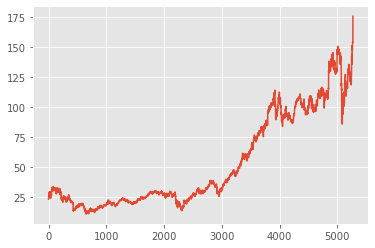

In [7]:
#remeber to add titles and all necessary info to your plots.
dis['Adj Close'].plot()
plt.show()

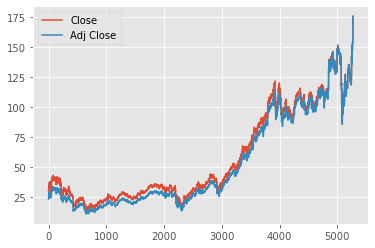

In [8]:
dis[['Close', 'Adj Close']].plot()
plt.show()

### Slicing by dates using inner join and joinning different stocks.

In [9]:
start_date = '2017-01-22'
end_date = '2017-01-26'
dates = pd.date_range(start_date, end_date)
print(dates[0])

2017-01-22 00:00:00


In [10]:
df = pd.DataFrame(index = dates)
dfDIS= pd.read_csv(path, index_col = 'Date', parse_dates = True, usecols=['Date', 'Adj Close'], na_values = ['nan'])
df = df.join(dfDIS, how = 'inner')
df = df.dropna()
df = df.rename(columns={'Adj Close':'DIS'})
df

,DIS
2017-01-23,102.580269
2017-01-24,103.327225
2017-01-25,103.461296
2017-01-26,103.480438


In [11]:
start_date = '2017-01-22'
end_date = '2019-01-26'
dates = pd.date_range(start_date, end_date)
df_all = pd.DataFrame(index = dates)
symbols = ['DIS', 'FB', 'TSLA']
for symbol in symbols:
    df_temp = pd.read_csv('{}.csv'.format(symbol), index_col = 'Date', parse_dates = True, usecols= ['Date', 'Adj Close'], na_values = 'nan')
    df_temp = df_temp.rename(columns = {'Adj Close': symbol})
    df_all = df_all.join(df_temp)
df.head()

,DIS
2017-01-23,102.580269
2017-01-24,103.327225
2017-01-25,103.461296
2017-01-26,103.480438


### Ploting using Pandas
#### We are switching to Facebook

In [12]:
fb = pd.read_csv(fb_path, index_col = 'Date', parse_dates = True, usecols= ['Date', 'Adj Close'])
type(fb)

pandas.core.frame.DataFrame

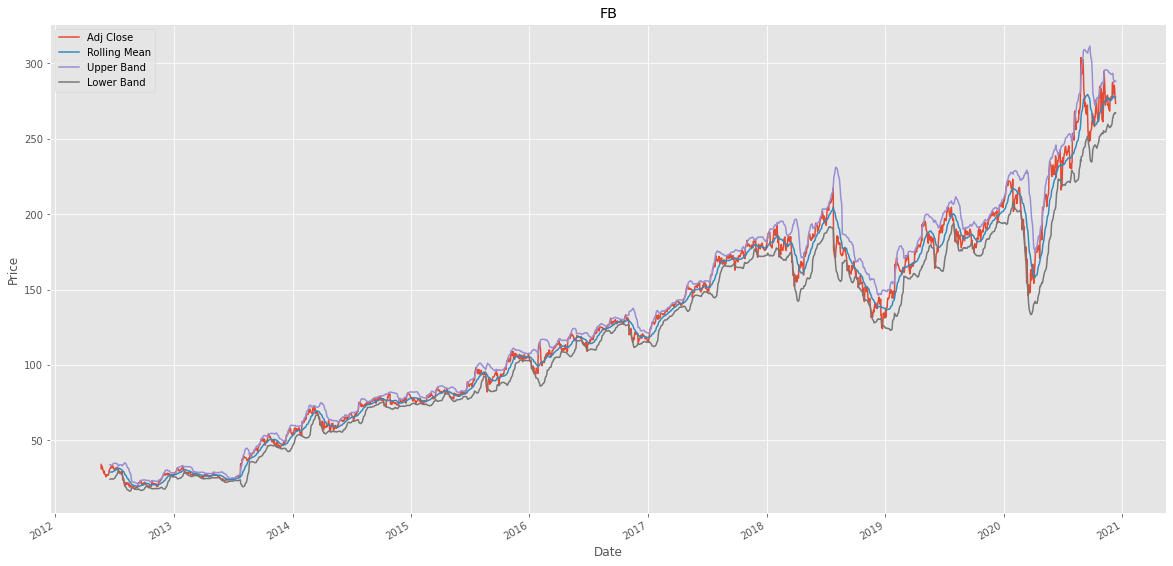

In [13]:
#Since first time using, the sintaxis was: rm_fb=pd.rolling_mean(fb, window= 20) Now try:
ax = fb.plot(title = 'FB', legend = 'FB', figsize=(20,10))
rm_fb= fb.rolling(window= 20).mean().rename(columns = {"Adj Close": "Rolling Mean"})
rm_fb.plot(legend='rolling mean', ax = ax)
std_fb = fb.rolling(window = 20).std().rename(columns = {"Adj Close": "Rolling Mean"}) #necessary to make the transformations below
upper_band = (rm_fb + std_fb * 2).rename(columns = {"Rolling Mean": "Upper Band"}) #Bollinger bands
lower_band = (rm_fb - std_fb * 2).rename(columns = {"Rolling Mean": "Lower Band"}) #Bollinger bands
upper_band.plot(legend = 'upper band', ax = ax)
lower_band.plot(legend = 'lower band', ax = ax)
ax.set_xlabel("Date")
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')
plt.show()

### Daily returns
To find this we need two days information, say yesterday and today. We will substract Todays from yesterday (if todays number is bigger then we will get a positive result, otherwise negative). That value will be divided by yesterdays value.

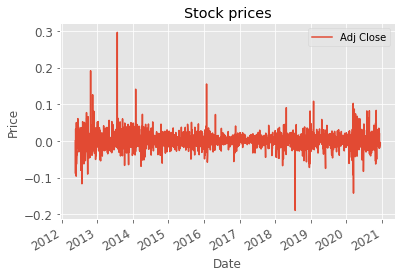

In [14]:
daily_return = fb.copy()
daily_return[1:] = (fb[1:]/ fb[:-1].values)-1 #(fb / fb.shift(1))-1
daily_return.iloc[0, :] = 0
ax = daily_return.plot(title = 'Stock prices', fontsize = 12)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

In [15]:
mean = daily_return['Adj Close'].mean()
print('Mean= ', mean)
std = daily_return['Adj Close'].std()
print('Standard Deviation= ', std)

Mean=  0.001239965253589607
Standard Deviation=  0.023502843771405896


### About kurtosis
* Positive kutosis: Fat tails. 
* Negative kurtosis: Skinny tails

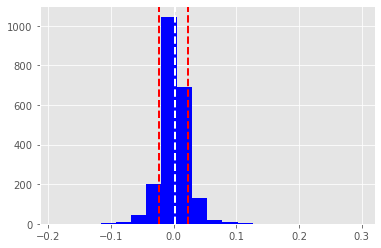

In [16]:
daily_return['Adj Close'].hist(bins = 20, color = "b")
plt.axvline(mean, color = 'w', linestyle = 'dashed', linewidth = 2)
plt.axvline(std, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(-std, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()
#Podemos usar fillna(method='ffill') FIll forward, fill backeard
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

### Analyzing multiple stocks
Using previous df_all

/home/mauriciomani/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-07a47797d2bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns.iloc[1:] = (daily_returns.iloc[1:]/daily_returns.iloc[:-1].values)-1
<ipython-input-17-07a47797d2bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns.iloc[

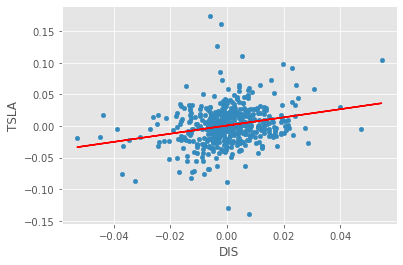

In [17]:
daily_returns = df_all.dropna()
daily_returns.iloc[1:] = (daily_returns.iloc[1:]/daily_returns.iloc[:-1].values)-1
daily_returns.iloc[0,:] = 0
daily_returns.plot(kind='scatter', x = 'DIS', y = 'TSLA')
beta_TSLA, alpha_TSLA = np.polyfit(daily_returns['DIS'].dropna(), daily_returns['TSLA'].dropna(), 1)
plt.plot(daily_returns['DIS'], beta_TSLA*daily_returns['DIS']+ alpha_TSLA, '-', color = 'r')
plt.show()

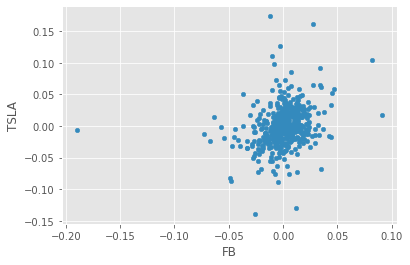

In [18]:
daily_returns.plot(kind='scatter', x = 'FB', y = 'TSLA')
plt.show()

In [19]:
print(daily_returns.corr(method = 'pearson'))

           DIS        FB      TSLA
DIS   1.000000  0.265474  0.238543
FB    0.265474  1.000000  0.264125
TSLA  0.238543  0.264125  1.000000


In [20]:
dis = pd.read_csv(path)
fb = pd.read_csv(fb_path)
kmb = pd.read_csv(kmb_path)
tsla = pd.read_csv(tsla_path)

In [21]:
def moving_average(sec, period = 7):
    sec[str(period) + 'MA'] = sec['Adj Close'].rolling(window = period, min_periods = 0).mean()
    return(sec.dropna())
def plot_moving_average(data, period = 7, days = 500, name = None):
    data['Date'] = pd.to_datetime(data['Date'])
    ma = (moving_average(data, period)).iloc[:days]
    plt.figure(figsize=(12, 8))
    plt.plot(ma['Date'], ma['Adj Close'])
    plt.plot(ma['Date'], ma['7MA'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

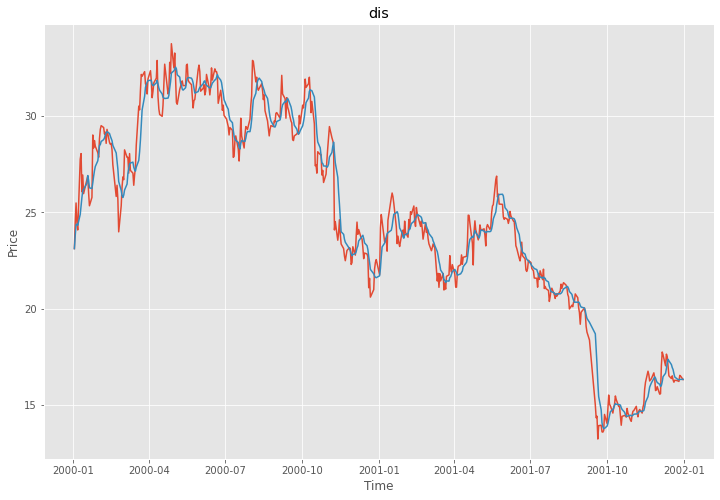

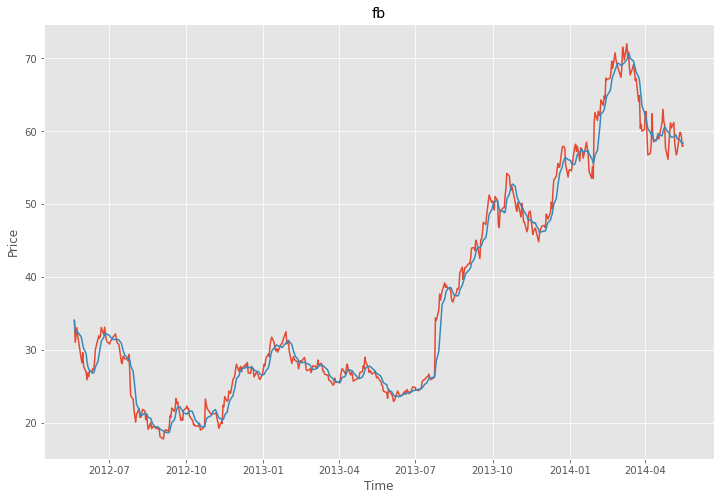

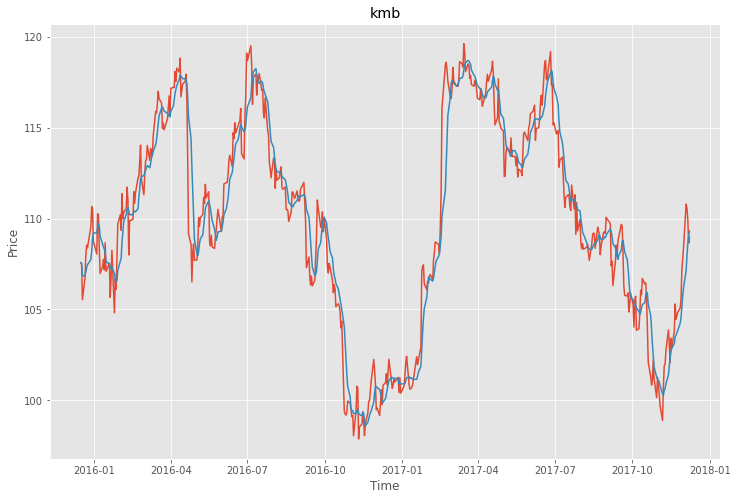

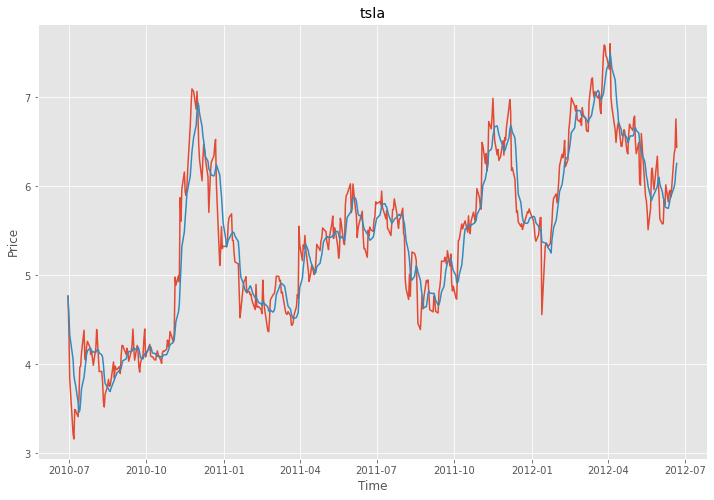

In [22]:
stocks = ["dis", "fb", "kmb", "tsla"]
for stock in stocks:
    plot_moving_average(globals()[stock], 7, 500, stock)

In [23]:
def moving_std(sec, period = 7):
    #Insert security as pandas dataframe
    sec[str(period) + 'MSTD'] = sec['Adj Close'].rolling(window = period, min_periods = 0).std()
    return(sec.dropna())
def bollinger_bands(data, period, days, name):
    data['Date'] = pd.to_datetime(data['Date'])
    data.index = data['Date']
    data = data.iloc[:days]
    ma = (moving_average(data, period))[(str(period) + 'MA')].copy()
    std = (moving_std(data, period))[(str(period) + 'MSTD')].copy()
    bollinger_pos = ma + (2 * std)
    bollinger_dow = ma - (2 * std)
    plt.figure(figsize=(15, 10))
    ax = data['Adj Close'].plot(label = name)
    ma.plot(label = 'Moving Average', linestyle='dashed', ax = ax)
    bollinger_pos.plot(label = 'Upper Band', linestyle='dashed', ax = ax)
    bollinger_dow.plot(label = 'Lower Band', linestyle='dashed', ax = ax)
    plt.legend(loc = 'best')
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

<ipython-input-21-3a5e2201ba5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MA'] = sec['Adj Close'].rolling(window = period, min_periods = 0).mean()
<ipython-input-23-d560a0d12c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MSTD'] = sec['Adj Close'].rolling(window = period, min_periods = 0).std()


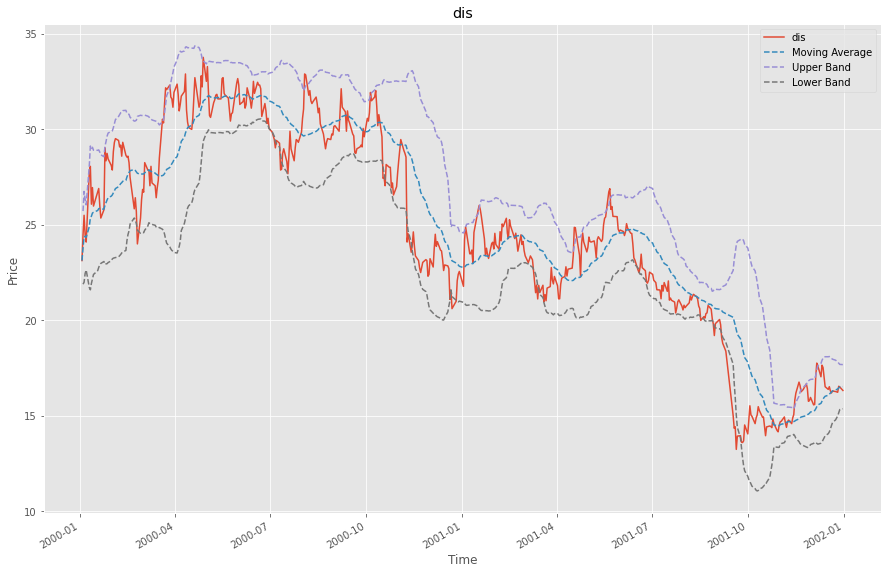

<ipython-input-21-3a5e2201ba5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MA'] = sec['Adj Close'].rolling(window = period, min_periods = 0).mean()
<ipython-input-23-d560a0d12c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MSTD'] = sec['Adj Close'].rolling(window = period, min_periods = 0).std()


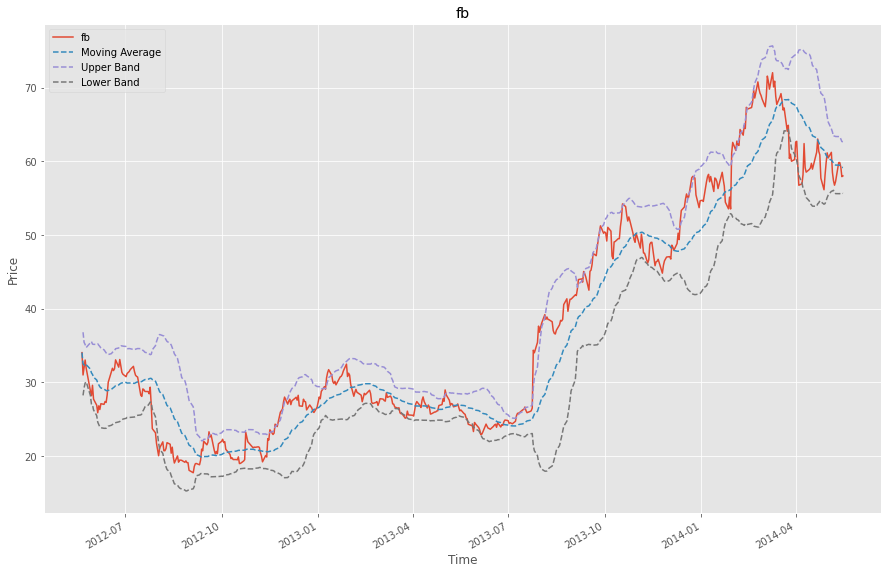

<ipython-input-21-3a5e2201ba5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MA'] = sec['Adj Close'].rolling(window = period, min_periods = 0).mean()
<ipython-input-23-d560a0d12c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MSTD'] = sec['Adj Close'].rolling(window = period, min_periods = 0).std()


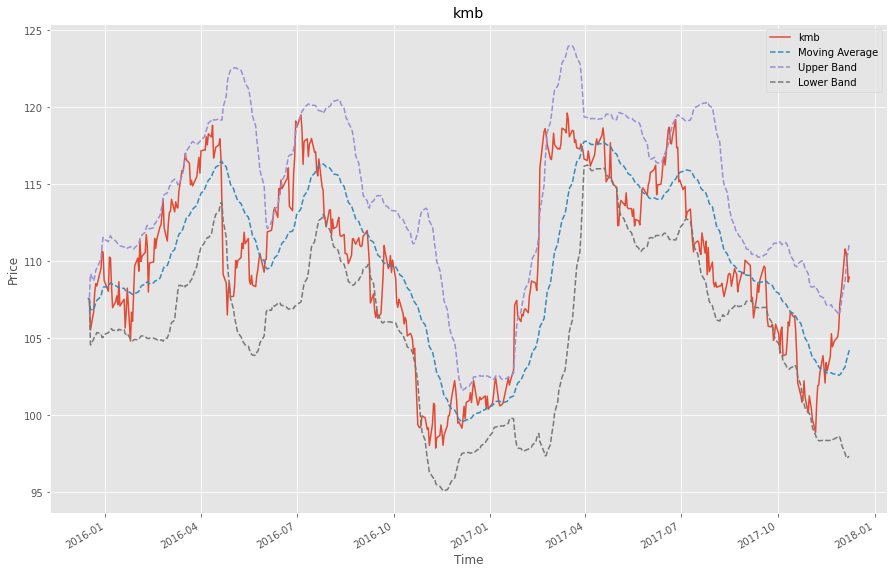

<ipython-input-21-3a5e2201ba5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MA'] = sec['Adj Close'].rolling(window = period, min_periods = 0).mean()
<ipython-input-23-d560a0d12c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec[str(period) + 'MSTD'] = sec['Adj Close'].rolling(window = period, min_periods = 0).std()


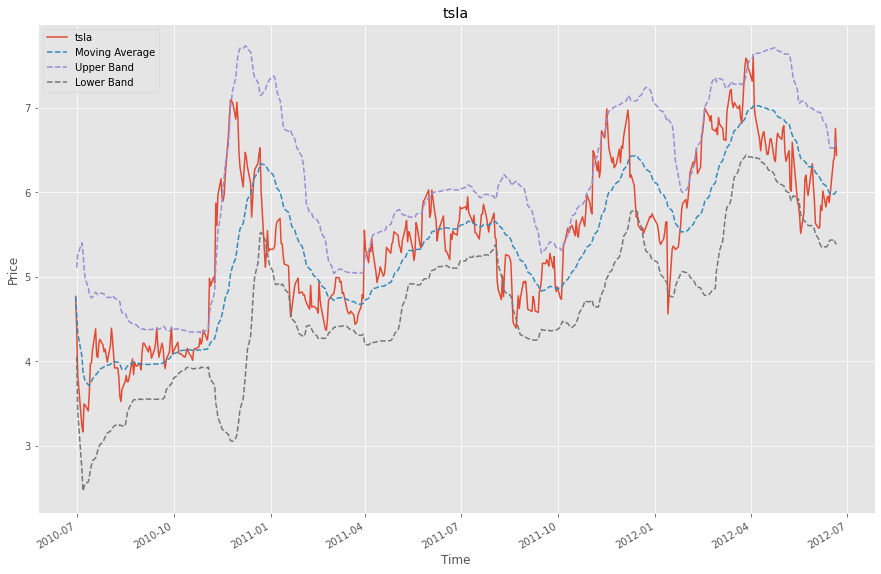

In [24]:
for stock in stocks:
    bollinger_bands(globals()[stock], 30, 500, stock)

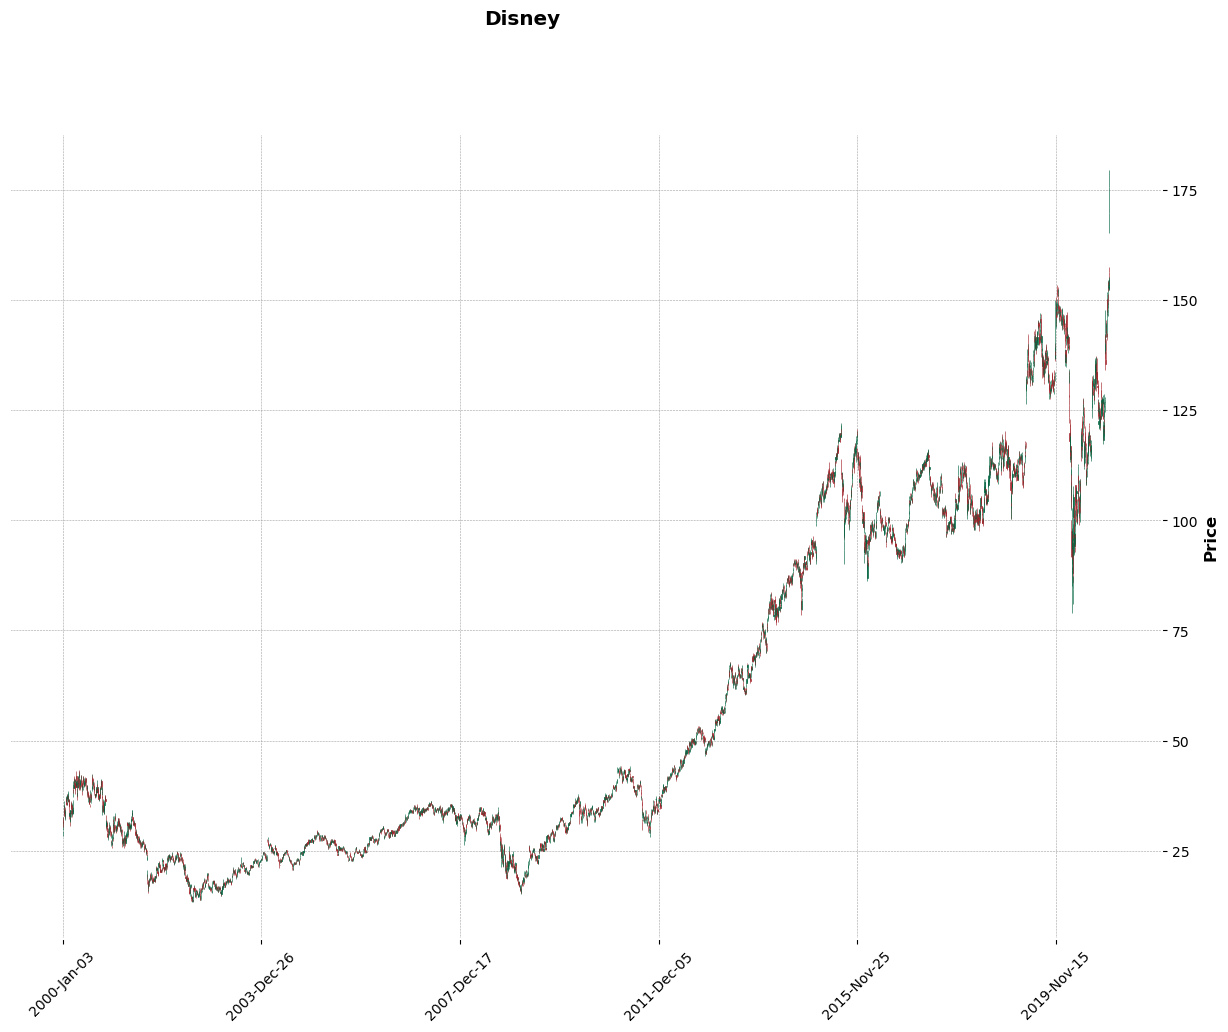

In [25]:
#You can also try mpl_finance, however there is no current manteinance
dis['Date'] = pd.to_datetime(dis['Date'])
dis.set_index("Date", inplace = True)
ohlc= dis[['Open', 'High', 'Low', 'Close']]
mpf.plot(ohlc, 
         type = "candle", 
         style="charles", 
         figscale = 2.0, 
         title='Disney')